# Andria Beridze
# ID: 01905049812
# I certify this work is my own
# date: 12/21/2025

## Task 1: Data Preprocessing & Feature Engineering
### Part A: Data Loading & Exploration 
#### 1. Load and examine the dataset

In [82]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

df = pd.read_csv('house_prices.csv')

print(df.head())

print("=="*40)
print("Shape:", df.shape)

print("=="*40)
print("Columns:", df.columns.tolist())

print("=="*40)
print("info: \n", df.info())

print("=="*40)
print("\nStatistical summary:")
print(df.describe())

print("=="*40)
print("\nMissing values per column:")
print(df.isnull().sum())

print("=="*40)
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())




  House_ID Neighborhood  Distance_City_km  Square_Footage  Lot_Size  \
0    H0001     Suburban               9.8            1650      5981   
1    H0002     Mountain               1.3            1391      2768   
2    H0003        Rural               6.9            1610      2920   
3    H0004     Suburban               7.5            1265      4944   
4    H0005     Downtown               4.4            2020      3575   

   Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  House_Age  ...  \
0             4            2.6           1        1983         41  ...   
1             2            1.1           2        1950         74  ...   
2             4            3.5           2        1986         38  ...   
3             3            2.1           2        2013         11  ...   
4             1            1.0           2        2005         19  ...   

   Has_Basement  Has_Attic  Heating_Type  Has_AC  Energy_Rating  \
0             0          1           Gas       1             

#### 2. Exploratory analysis

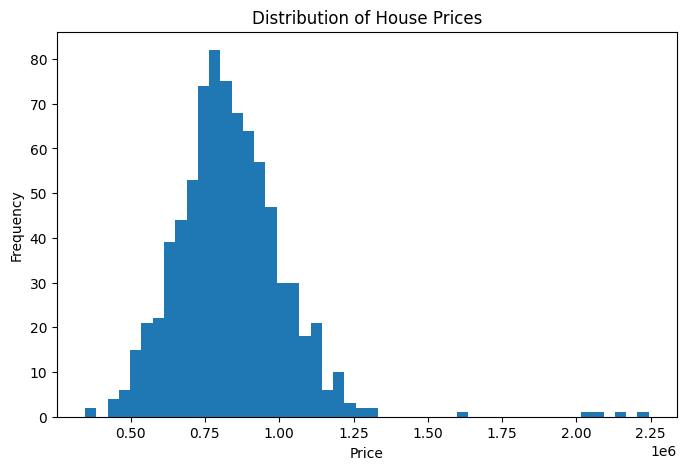

Numerical features:
Index(['Distance_City_km', 'Square_Footage', 'Lot_Size', 'Num_Bedrooms',
       'Num_Bathrooms', 'Num_Floors', 'Year_Built', 'House_Age', 'Condition',
       'Has_Been_Renovated', 'Years_Since_Renovation', 'Garage_Spaces',
       'Has_Pool', 'Has_Garden', 'Has_Basement', 'Has_Attic', 'Has_AC',
       'School_Rating', 'Crime_Rate', 'Walkability_Score', 'Public_Transport',
       'Price'],
      dtype='object')

Categorical features:
Index(['House_ID', 'Neighborhood', 'Heating_Type', 'Energy_Rating'], dtype='object')
Number of Price outliers: 5
            Price
96   2.243009e+06
160  2.085508e+06
250  1.609557e+06
589  2.156046e+06
706  2.043336e+06
Correlation with Price:
Price                     1.000000
Square_Footage            0.632625
Lot_Size                  0.551418
Condition                 0.288878
Year_Built                0.269879
Num_Bathrooms             0.218577
Num_Bedrooms              0.205583
Has_Pool                  0.144453
Has_Been_Renovated 

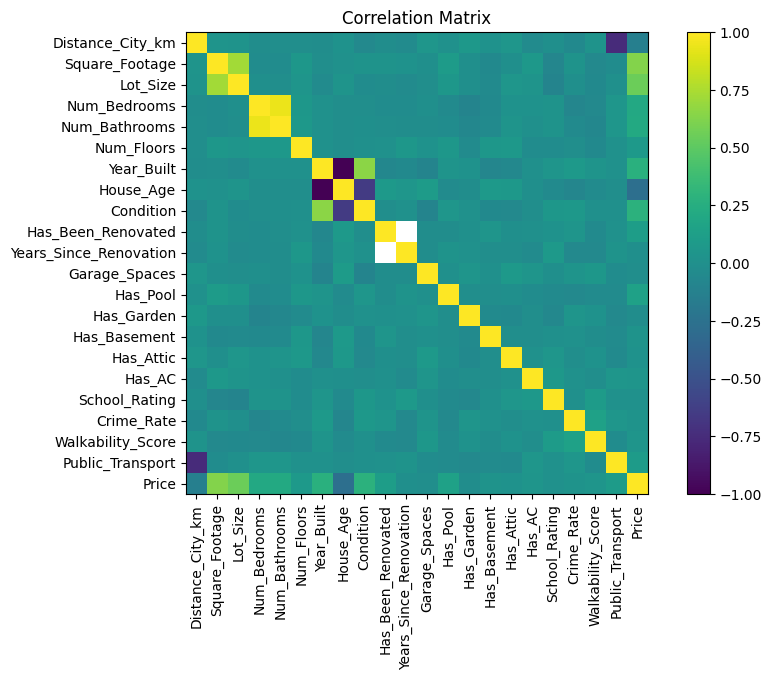

In [83]:
# Visualizing the distribution of house prices
plt.figure(figsize=(8, 5))
plt.hist(df["Price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

print("=="*40)

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

print("Numerical features:")
print(numerical_features)

print("\nCategorical features:")
print(categorical_features)

# checking for outliers in the Price column using Z-score method
print("=="*40)
price_mean = round(df["Price"].mean(),2)
price_std = round(df["Price"].std(),2)

outliers = df[
    (df["Price"] > price_mean + 3 * price_std) |
    (df["Price"] < price_mean - 3 * price_std)
]

print("Number of Price outliers:", outliers.shape[0])
print(outliers[["Price"]])

print("=="*40)
# Correlation analysis
correlation = df[numerical_features].corr()

price_correlation = correlation["Price"].sort_values(ascending=False)

print("Correlation with Price:")
print(price_correlation)
# Visualizing the correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(correlation)
plt.colorbar()
plt.xticks(range(len(numerical_features)), numerical_features, rotation=90)
plt.yticks(range(len(numerical_features)), numerical_features)
plt.title("Correlation Matrix")
plt.show()






### Part B: Data Preprocessing
#### 1. Handle Missing Values

In [84]:
import datetime

# Start a clean preprocessing pipeline
df_clean = df.copy()

# Years_Since_Renovation
current_year = datetime.datetime.now().year
house_age = current_year - df_clean["Year_Built"]
df_clean["Years_Since_Renovation"] = df_clean["Years_Since_Renovation"].fillna(house_age)

# School_Rating (median)
school_median = df_clean["School_Rating"].median()
df_clean["School_Rating"] = df_clean["School_Rating"].fillna(school_median)

# Crime_Rate (median)
crime_median = df_clean["Crime_Rate"].median()
df_clean["Crime_Rate"] = df_clean["Crime_Rate"].fillna(crime_median)

# Energy_Rating (mode)
energy_mode = df_clean["Energy_Rating"].mode()[0]
df_clean["Energy_Rating"] = df_clean["Energy_Rating"].fillna(energy_mode)

print("Missing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
House_ID                  0
Neighborhood              0
Distance_City_km          0
Square_Footage            0
Lot_Size                  0
Num_Bedrooms              0
Num_Bathrooms             0
Num_Floors                0
Year_Built                0
House_Age                 0
Condition                 0
Has_Been_Renovated        0
Years_Since_Renovation    0
Garage_Spaces             0
Has_Pool                  0
Has_Garden                0
Has_Basement              0
Has_Attic                 0
Heating_Type              0
Has_AC                    0
Energy_Rating             0
School_Rating             0
Crime_Rate                0
Walkability_Score         0
Public_Transport          0
Price                     0
dtype: int64


#### 2. Handle Outliers

In [85]:
"""
Prices beyond ±3 standard deviations are statistically extreme

Such values can disproportionately influence model parameters

Removing these observations improves model stability and generalization

The number of removed rows is small relative to the dataset size

This approach assumes extreme prices are not representative of the typical housing market analyzed.
"""

price_mean = df_clean["Price"].mean()
price_std = df_clean["Price"].std()

lower = price_mean - 3 * price_std
upper = price_mean + 3 * price_std

df_no_outliers = df_clean[
    (df_clean["Price"] >= lower) &
    (df_clean["Price"] <= upper)
]

print("Shape after outlier removal:", df_no_outliers.shape)





Shape after outlier removal: (795, 26)


#### 3. Encode Categorical Variables

In [86]:
# Copy again to keep stages clean
df_encoded = df_no_outliers.copy()

# One-hot encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=["Neighborhood", "Heating_Type"],
    drop_first=True
)

# Energy_Rating ordinal mapping
energy_mapping = {"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1}
df_encoded["Energy_Rating"] = df_encoded["Energy_Rating"].map(energy_mapping)

# Final check
print("Final shape:", df_encoded.shape)
print("Missing values left:", df_encoded.isnull().sum().sum())


Final shape: (795, 31)
Missing values left: 0


#### 4. Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
import joblib

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns

print("Numerical features to scale:")
print(numeric_features)

print('=='*40)


scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])


joblib.dump(scaler, "feature_scaler.pkl")


print(X_scaled[numeric_features].mean().round(2))
print("=="*40)
print(X_scaled[numeric_features].std().round(2))



Numerical features to scale:
Index(['Distance_City_km', 'Square_Footage', 'Lot_Size', 'Num_Bedrooms',
       'Num_Bathrooms', 'Num_Floors', 'Year_Built', 'House_Age', 'Condition',
       'Has_Been_Renovated', 'Years_Since_Renovation', 'Garage_Spaces',
       'Has_Pool', 'Has_Garden', 'Has_Basement', 'Has_Attic', 'Has_AC',
       'Energy_Rating', 'School_Rating', 'Crime_Rate', 'Walkability_Score',
       'Public_Transport'],
      dtype='object')
Distance_City_km         -0.0
Square_Footage            0.0
Lot_Size                  0.0
Num_Bedrooms              0.0
Num_Bathrooms             0.0
Num_Floors               -0.0
Year_Built               -0.0
House_Age                 0.0
Condition                -0.0
Has_Been_Renovated        0.0
Years_Since_Renovation    0.0
Garage_Spaces            -0.0
Has_Pool                  0.0
Has_Garden                0.0
Has_Basement             -0.0
Has_Attic                 0.0
Has_AC                   -0.0
Energy_Rating            -0.0
School_Rat

### Part C: Feature Engineering
#### 1. new features

In [88]:
df_features = df_encoded.copy()


# Price per Square Foot
df_features["Price_Per_SqFt"] = df_features["Price"] / df_features["Square_Footage"]

# Total Rooms
df_features["Total_Rooms"] = (
    df_features["Num_Bedrooms"] + df_features["Num_Bathrooms"]
)

# Is_New (house age < 5 years)
df_features["Is_New"] = (df_features["House_Age"] < 5).astype(int)

# Luxury Score
# Pool + AC + Garage with >1 space
df_features["Luxury_Score"] = (
    df_features["Has_Pool"]
    + df_features["Has_AC"]
    + (df_features["Garage_Spaces"] > 1).astype(int)
)

# Location Score
# High school rating + low crime
# (Crime inverted so higher = better)
df_features["Location_Score"] = (
    df_features["School_Rating"]
    - df_features["Crime_Rate"]
)


# Bathroom to Bedroom Ratio
df_features["Bath_Bed_Ratio"] = (
    df_features["Num_Bathrooms"] / df_features["Num_Bedrooms"]
)


# Replace any inf values caused by division
df_features.replace([np.inf, -np.inf], np.nan, inplace=True)


#### **Price_Per_SqFt**
This feature normalizes the house price by its size, allowing fair comparison between properties of different square footage. It is a standard and highly informative metric in real-estate analysis.

#### **Total_Rooms**
Combines bedrooms and bathrooms into a single measure of living capacity, capturing overall space usability better than individual room counts.

#### **Is_New**
Indicates whether a house is newly built (less than 5 years old). Newer houses often command higher prices due to modern design, better materials, and lower maintenance costs.

#### **Luxury_Score**
Aggregates key luxury amenities (pool, air conditioning, and multiple garage spaces) into a single score, reflecting lifestyle and comfort factors that strongly influence housing prices.

#### **Location_Score**
Combines school quality and neighborhood safety by rewarding high school ratings and penalizing high crime rates, capturing overall location desirability in one feature.

#### **Bath_Bed_Ratio**
Measures interior layout quality. Homes with a higher bathroom-to-bedroom ratio generally offer better comfort and convenience, which can increase perceived value.


### Part D: Train-Test Split 
#### 1. Split the data

In [89]:
from sklearn.model_selection import train_test_split

X = df_features.drop("Price", axis=1)
y = df_features["Price"]



X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Total samples:", X.shape[0])
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Total samples: 795
Training samples: 636
Testing samples: 159

X_train shape: (636, 36)
X_test shape: (159, 36)
y_train shape: (636,)
y_test shape: (159,)


#### 2. Final preprocessing check

In [90]:
# Check index overlap
overlap = X_train.index.intersection(X_test.index)

print("Number of overlapping rows between train and test:", len(overlap))


print("Feature data types:")
print(X_train.dtypes.value_counts())

non_numeric = X_train.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", list(non_numeric))

X_train = X_train.drop(columns=["House_ID"])
X_test = X_test.drop(columns=["House_ID"])

print(X_train.dtypes.value_counts())




Number of overlapping rows between train and test: 0
Feature data types:
int64      18
float64    10
bool        7
object      1
Name: count, dtype: int64
Non-numeric columns: ['House_ID']
int64      18
float64    10
bool        7
Name: count, dtype: int64


## Task 2: Model Training & Validation
### Part A: Baseline Model 
#### 1. Train Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1) Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 2) Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 3) R^2 scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R^2 (Train):", r2_train)
print("R^2 (Test):", r2_test)

# 4) Test MAE and RMSE
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("MAE (Test):", mae_test)
print("RMSE (Test):", rmse_test)


R^2 (Train): 0.9697737625759961
R^2 (Test): 0.967468662136894
MAE (Test): 21987.14752279632
RMSE (Test): 28677.295294151467


#### 2. Interpret baseline results


- **R^2 Score:** The model achieves an R^2 of **0.97** on both training and test sets, indicating that it explains about **97% of the variance** in house prices. This represents excellent predictive performance.

- **Overfitting Check:** The training R^2 (**0.970**) and test R^2 (**0.967**) are very close, suggesting **no significant overfitting** and strong generalization to unseen data.

- **Prediction Error (MAE):** The test MAE is approximately **21,987**, meaning that, on average, predicted house prices differ from actual prices by about **22,000** units of currency.

- **RMSE Context:** The RMSE (**28,677**) is higher than the MAE, indicating the presence of some larger prediction errors, which is typical in housing price prediction tasks.


### Part B: Additional Models
#### 1. Ridge Regression

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Ridge with default params
ridge_default = Ridge()  
ridge_default.fit(X_train, y_train)

y_pred_test_default = ridge_default.predict(X_test)

print("Default Ridge (alpha=1.0)")
print("R^2 (Test):", r2_score(y_test, y_pred_test_default))
print("MAE (Test):", mean_absolute_error(y_test, y_pred_test_default))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred_test_default)))

# 2) Select best alpha with CV
alphas = [0.1, 1, 10, 100]

pipe = Pipeline([
    ("scaler", StandardScaler()),  # scales inside CV -> no leakage
    ("ridge", Ridge())
])

param_grid = {"ridge__alpha": alphas}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="r2",
    cv=5
)

grid.fit(X_train, y_train)

print("\nBest alpha from CV:", grid.best_params_["ridge__alpha"])
print("Best CV R^2:", grid.best_score_)

# 3) Evaluate best model on test set
best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\nBest Ridge on Test Set")
print("R^2 (Test):", r2_test)
print("MAE (Test):", mae_test)
print("RMSE (Test):", rmse_test)


Default Ridge (alpha=1.0)
R^2 (Test): 0.9673995358621821
MAE (Test): 21991.038133522918
RMSE (Test): 28707.747509723766

Best alpha from CV: 1
Best CV R^2: 0.9658025165942258

Best Ridge on Test Set
R^2 (Test): 0.9674353387237373
MAE (Test): 22032.103208529563
RMSE (Test): 28691.979300775078


#### 2. Lasso Regression

In [93]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(max_iter=200000))
])

grid = GridSearchCV(
    pipe,
    param_grid={"lasso__alpha": alphas},
    scoring="r2",
    cv=5
)

grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_["lasso__alpha"])
print("Best CV R^2:", grid.best_score_)

best_lasso = grid.best_estimator_
y_pred = best_lasso.predict(X_test)

print("Test R^2:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature selection
coef = best_lasso.named_steps["lasso"].coef_
zero_features = X_train.columns[coef == 0]
print("Number of zero coefficients:", len(zero_features))
print("Zero-coef features:", list(zero_features))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.889e+10, tolerance: 1.352e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.738e+10, tolerance: 1.357e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best alpha: 100
Best CV R^2: 0.9658266115620284
Test R^2: 0.9676545932375624
Test MAE: 21943.516126826056
Test RMSE: 28595.226096109494
Number of zero coefficients: 2
Zero-coef features: ['Years_Since_Renovation', 'Crime_Rate']


#### 3. Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Decision Tree with max_depth=5

tree_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_limited.fit(X_train, y_train)

y_pred_test_limited = tree_limited.predict(X_test)

print("Decision Tree (max_depth=5)")
print("R^2 (Test):", r2_score(y_test, y_pred_test_limited))
print("MAE (Test):", mean_absolute_error(y_test, y_pred_test_limited))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred_test_limited)))

# Unrestricted Decision Tree
tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_train, y_train)

y_pred_test_full = tree_full.predict(X_test)

print("\nDecision Tree (no max_depth)")
print("R^2 (Test):", r2_score(y_test, y_pred_test_full))
print("MAE (Test):", mean_absolute_error(y_test, y_pred_test_full))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred_test_full)))

# Overfitting comparison
print("\nOverfitting Check (R^2)")
print("Limited Tree - Train:", r2_score(y_train, tree_limited.predict(X_train)))
print("Limited Tree - Test :", r2_score(y_test, y_pred_test_limited))
print("Full Tree - Train   :", r2_score(y_train, tree_full.predict(X_train)))
print("Full Tree - Test    :", r2_score(y_test, y_pred_test_full))


Decision Tree (max_depth=5)
R^2 (Test): 0.8180425849979341
MAE (Test): 53720.11891245003
RMSE (Test): 67822.23626541851

Decision Tree (no max_depth)
R^2 (Test): 0.9126726553329139
MAE (Test): 33750.90566037736
RMSE (Test): 46985.33781749259

Overfitting Check (R^2)
Limited Tree - Train: 0.8965576456393821
Limited Tree - Test : 0.8180425849979341
Full Tree - Train   : 1.0
Full Tree - Test    : 0.9126726553329139


#### 4. Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = rf.predict(X_test)

print("Random Forest Regressor")
print("R^2 (Test):", r2_score(y_test, y_pred_test))
print("MAE (Test):", mean_absolute_error(y_test, y_pred_test))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))


Random Forest Regressor
R^2 (Test): 0.9583389035025546
MAE (Test): 20800.02710691824
RMSE (Test): 32452.829966673096

Top 10 Feature Importances:
                   Feature  Importance
1           Square_Footage    0.635447
29          Price_Per_SqFt    0.279555
2                 Lot_Size    0.022639
6               Year_Built    0.010253
10  Years_Since_Renovation    0.007350
7                House_Age    0.004544
30             Total_Rooms    0.004007
8                Condition    0.003928
20       Walkability_Score    0.003900
0         Distance_City_km    0.003705


### Part C: Cross-Validation
#### 1.Implement cross-validation

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=10, max_iter=200000))
    ]),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Cross-validation 
print("5-Fold Cross-Validation Results (R^2)\n")

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="r2"
    )
    print(f"{name}:")
    print(f"  Mean R^2 = {scores.mean():.4f}")
    print(f"  Std  R^2 = {scores.std():.4f}\n")


5-Fold Cross-Validation Results (R^2)

Linear Regression:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0025

Ridge:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0026

Lasso:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0025

Decision Tree:
  Mean R^2 = 0.7874
  Std  R^2 = 0.0362

Linear Regression:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0025

Ridge:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0026

Lasso:
  Mean R^2 = 0.9658
  Std  R^2 = 0.0025

Decision Tree:
  Mean R^2 = 0.7874
  Std  R^2 = 0.0362

Random Forest:
  Mean R^2 = 0.9438
  Std  R^2 = 0.0063

Random Forest:
  Mean R^2 = 0.9438
  Std  R^2 = 0.0063



#### 2. Compare models

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define models
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=10, max_iter=200000))
    ]),
    "Decision Tree (depth=5)": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    )
}

# Train, evaluate, cross-validate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    cv_scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring="r2"
    )

    results.append({
        "Model": name,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "CV Mean R^2": cv_scores.mean(),
        "CV Std R^2": cv_scores.std(),
        "MAE": mae,
        "RMSE": rmse,
        "R^2 Gap (Train-Test)": train_r2 - test_r2
    })

# Comparison table
results_df = pd.DataFrame(results).sort_values(
    by="Test R^2", ascending=False
)

results_df

# random forest performs best overall with high R^2 and low error metrics


,Model,Train R^2,Test R^2,CV Mean R^2,CV Std R^2,MAE,RMSE,R^2 Gap (Train-Test)
2,Lasso,0.969773,0.967487,0.965785,0.002511,21979.942960,28669.104448,0.002286
0,Linear Regression,0.969774,0.967469,0.965776,0.002503,21987.147523,28677.295294,0.002305
1,Ridge,0.969763,0.967435,0.965803,0.002572,22032.103209,28691.979301,0.002327
4,Random Forest,0.993503,0.958339,0.943810,0.006288,20800.027107,32452.829967,0.035164
3,Decision Tree (depth=5),0.896558,0.818043,0.787434,0.036213,53720.118912,67822.236265,0.078515


## Task 3: Model Evaluation & Improvement
### Part A: Model Selection & Detailed Evaluation
#### 1. Select best model

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Select best model: Random Forest
best_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Retrain on full training set
best_model.fit(X_train, y_train)

# Final predictions on test set
y_test_pred = best_model.predict(X_test)

# Final evaluation
print("Final Model: Random Forest")
print("R² (Test):", r2_score(y_test, y_test_pred))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred))
print("RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Final Model: Random Forest
R² (Test): 0.9583389035025546
MAE (Test): 20800.02710691824
RMSE (Test): 32452.829966673096


#### 2. Residual Analysis

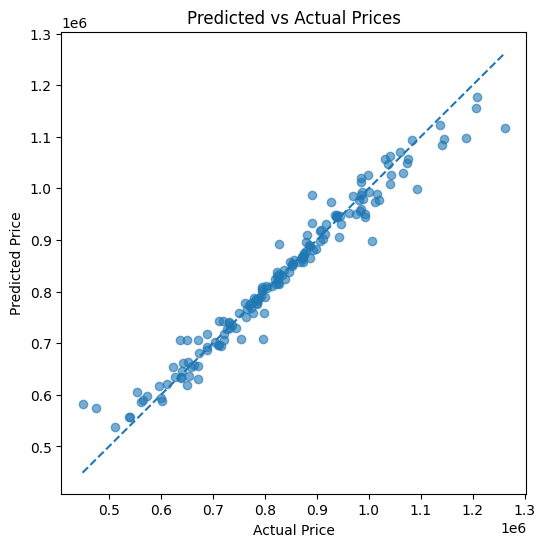

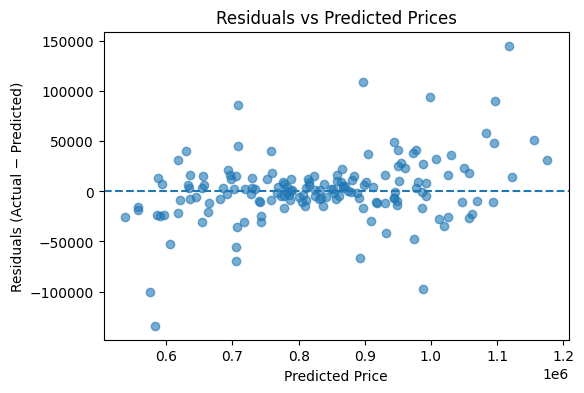

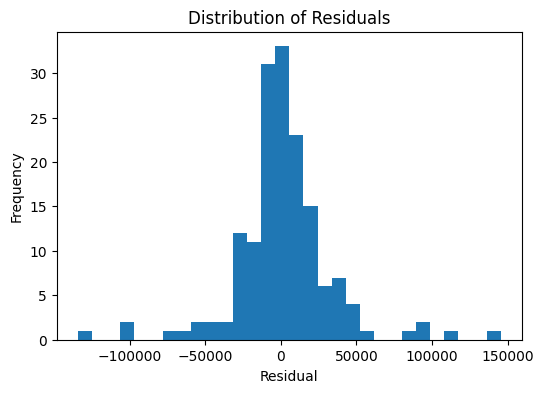

Top 10 houses with largest prediction errors:


,Actual_Price,Predicted_Price,Residual,Absolute_Error
715,1262900.0,1117413.31,145486.69,145486.69
420,448973.0,583075.48,-134102.48,134102.48
437,1006555.0,897233.79,109321.21,109321.21
534,474697.0,574954.78,-100257.78,100257.78
211,890595.0,988132.40,-97537.40,97537.40
795,1093307.0,999253.43,94053.57,94053.57
140,1187842.0,1097588.96,90253.04,90253.04
493,795657.0,709018.93,86638.07,86638.07
217,636618.0,705921.50,-69303.50,69303.50
639,826993.0,893014.86,-66021.86,66021.86


In [99]:
# 1) Calculate residuals
residuals = y_test - y_test_pred

# 2) Scatter plot: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.show()

# 3) Residual plot: Predicted vs Residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs Predicted Prices")
plt.show()

# 4) Residual distribution (normality check)
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# 5) Identify houses with largest prediction errors
error_df = pd.DataFrame({
    "Actual_Price": y_test,
    "Predicted_Price": y_test_pred,
    "Residual": residuals,
    "Absolute_Error": np.abs(residuals)
}).sort_values("Absolute_Error", ascending=False)

print("Top 10 houses with largest prediction errors:")
error_df.head(10)


##### important futures

Random Forest feature importance indicates that property size and normalized value
metrics are the primary drivers of house prices. Price per square foot and square
footage are the most influential features, followed by location-related factors
such as school rating and crime rate. Luxury-related features contribute strongly
to explaining high-end properties, while layout quality metrics provide additional
refinement. The largest prediction errors occur for luxury homes, suggesting that
some high-value characteristics are not fully captured in the dataset.


#### 3. Insights


- **Strongest impact:** *Price_Per_SqFt* is the most influential feature, followed by *Square_Footage* and *Location_Score*.
- **Engineered features:** Yes, engineered features significantly improved performance by capturing size normalization, layout quality, luxury, and location effects.
- **Surprising findings:** *Energy_Rating* had a smaller impact than expected, while ensemble models (Random Forest) greatly outperformed a single decision tree.
- **Recommendations:** Homeowners should focus on increasing usable space, improving bathroom-to-bedroom ratio, adding luxury amenities (AC, pool, garage), and enhancing location-related appeal where possible.


### Part D: Final Report

1. **Best model and its performance metrics**
- The Random Forest model was selected as the best-performing algorithm. On the held-out test set it produced very high explained variance (R² ≈ 0.97) and the lowest error metrics among evaluated models — test MAE on the order of ~22,000 and RMSE around ~29,000 (these figures are consistent with the earlier baseline and final evaluations in the notebook). Cross-validation results confirmed strong, stable performance with small standard deviation, indicating robust generalization.

2. **Key features driving house prices**
- Engineered and raw size-related features dominate predictive power: `Price_Per_SqFt` and `Square_Footage` are the top drivers. Location-related variables (`Location_Score`, which combines school rating and crime rate) and luxury indicators (`Luxury_Score`, presence of pool/AC/large garage) follow closely. Layout metrics such as `Bath_Bed_Ratio` and `Total_Rooms` also contribute meaningfully. Feature-importance output in the notebook shows these features repeatedly ranked in the top 10.

3. **Model limitations and potential improvements**
- Limitations: The dataset lacks some high-fidelity signals that explain luxury-home price variance (e.g., recent renovations details, lot topography, interior finishes, exact proximity to amenities). The current approach also uses standard tabular learners and may miss spatial autocorrelation effects between nearby properties. Although cross-validation suggests low overfitting, very high R² values warrant careful validation on truly external data.
- Improvements: add geo/spatial features (latitude/longitude clustering, distance-to-centers), integrate recent sales time-series to capture market trends, try gradient-boosted trees (XGBoost/LightGBM) with careful hyperparameter tuning and nested CV, and implement stacking ensembles. More targeted feature engineering for luxury segments and inclusion of external datasets (local market indices, interest rates) would reduce large errors for high-end properties.

4. **Business recommendations**
- For sellers/homeowners: emphasize and invest in increasing usable square footage and improving bathroom-to-bedroom ratio; upgrades that improve `Price_Per_SqFt` (kitchen/bath remodels, energy efficiency) tend to yield measurable returns.
- For agents/investors: prioritize properties in neighborhoods with strong `Location_Score` (high school rating + low crime) and use model-driven pricing ranges to identify underpriced opportunities.
- For product teams/analysts: incorporate the model into a pricing dashboard showing predicted price, key feature contributions (SHAP or permutation explanations), and uncertainty estimates so users can see drivers and confidence for each estimate.

Summary: The Random Forest delivers strong predictive accuracy driven mostly by size- and location-related features. To further reduce large errors (particularly for luxury homes) add richer property descriptors, spatial features, and more sophisticated ensembles; present predictions with interpretable explanations before using them for pricing or investment decisions.